## Titanic Dataset: Exploratory Data Analysis

### 1) Get data

In [1]:
import pandas as pd
import numpy as np

# Get csv
df_train = pd.read_csv("../dataset/train.csv")
df_test = pd.read_csv("../dataset/test.csv")

### 2) Exploring Data

In [2]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


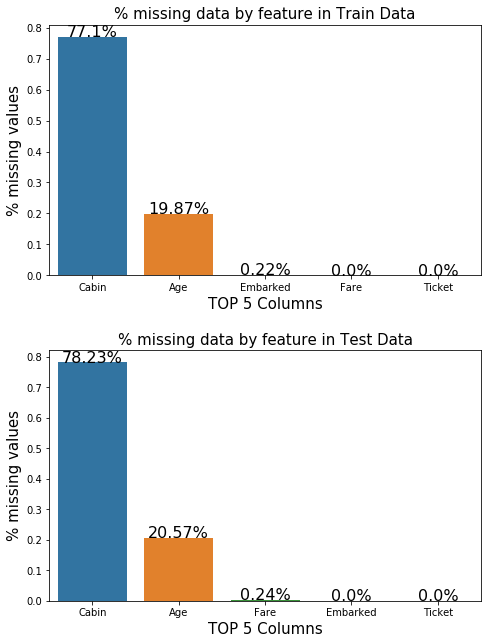

In [89]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Visualization of null data
def plot_nulls(df, title='% missing data by feature'):
    N_FEATURE_DISPLAY = 5 #DISPLAY TOP 5
    percent_null = (df.isnull().sum().sort_values(ascending=False)/df.shape[0]).iloc[:N_FEATURE_DISPLAY]
    percent_null = pd.DataFrame({'feature':percent_null.index, 'percent':percent_null.values})
    g = sns.barplot(x='feature', y='percent',data=percent_null)
    for index, row in percent_null.iterrows():
        g.text(row.name,row.percent,
               '{0}%'.format(round(row.percent*100,2))
               ,color='black'
               ,ha="center"
               ,fontsize=16
              )
    plt.xlabel('TOP 5 Columns', fontsize=15)
    plt.ylabel('% missing values', fontsize=15)
    plt.title(title, fontsize=15)
    return g

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
plt.subplot(2, 1, 1)
g = plot_nulls(df_train,title='% missing data by feature in Train Data')
plt.subplot(2, 1, 2)
h = plot_nulls(df_test,title='% missing data by feature in Test Data')
plt.subplots_adjust(top=2, bottom=0.00, left=0, right=1, hspace=0.3,wspace=0)

### Data Cleaning

The training and test dataset are balanced. For null values I decided to:

 * Drop **Cabin** feature from analysis becuase it has too much missing values
 * Fill Null values from **Age**, **Embarked** and **Fare** with mean values

In [90]:
df_train = df_train.drop(columns=['Cabin'])
df_test  = df_test.drop(columns=['Cabin'])
df_train = df_train.fillna(df_train.mean())
df_test  = df_test.fillna(df_train.mean())

In [91]:
#Final Dataset info
df_train['Sex'] = df_train['Sex'].astype(str)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


### Visualizing Distribution

For reading data and performing EDA operations, I’ll primarily use the **numpy** and **pandas** Python packages, which offer simple API's that allow us to plug our data sources and perform our desired operation. For the output, we’ll be using the **Seaborn** package which is a Python-based data visualization library built on **Matplotlib**.

1 - Categorical data distribution

2 - Univariate distribution of numerical columns

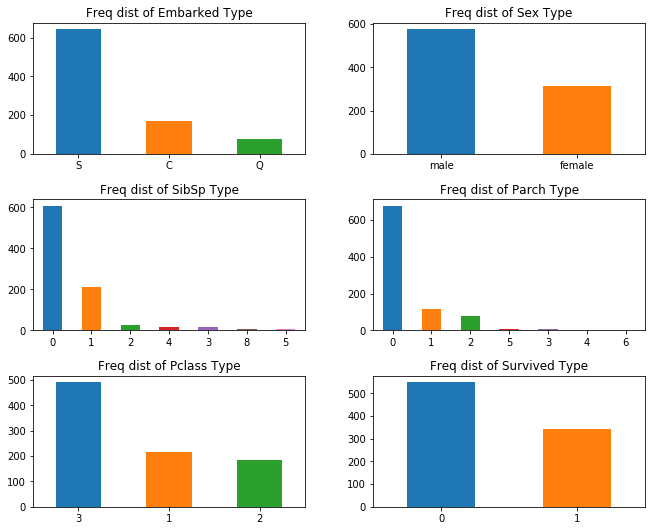

In [117]:
# 1 - Categorical Data Distribution
import seaborn as sns
from matplotlib import pyplot as plt
col_names = ['Embarked','Sex', 'SibSp', 'Parch', 'Pclass','Survived']

def plot_titanic_barplot(df,features):
    plt.figure(figsize=(10,8))
    for i,column in enumerate(features):
        plt.subplot(3, 2, i+1)
        g = df[column].value_counts().plot.bar(title="Freq dist of {0} Type".format(column))
        for item in g.get_xticklabels():
            item.set_rotation(0)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.25)

plot_titanic_barplot(df_train,col_names)

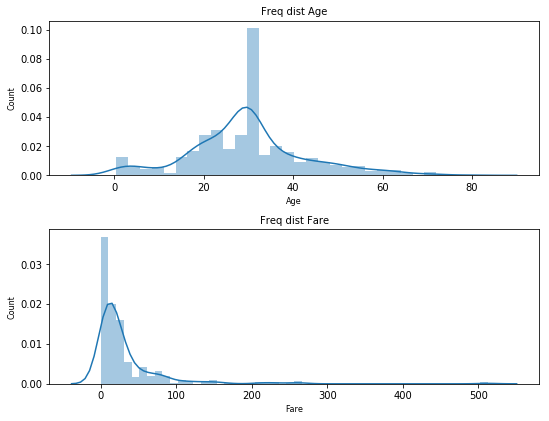

In [111]:
# 2 - Univariate Data Distribution
import seaborn as sns

col_names = ['Age','Fare']

def plot_titanic_distplot(df,features):
    fig, ax = plt.subplots(len(features), figsize=(8,6))
    for i, col_val in enumerate(features):
        g = sns.distplot(df_train[col_val], hist=True, ax=ax[i])
        ax[i].set_title('Freq dist '+col_val, fontsize=10)
        ax[i].set_xlabel(col_val, fontsize=8)
        ax[i].set_ylabel('Count', fontsize=8)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,wspace=0.25)
    
plot_titanic_distplot(df_train,col_names)

### Check training and testing data is balanced

Training and Testing data present the same proportion of outcomes

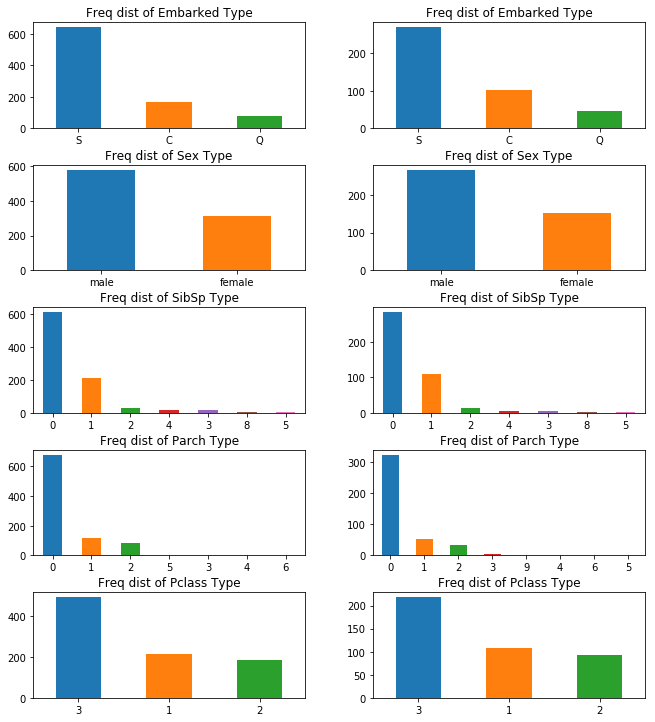

In [120]:
import seaborn as sns
from matplotlib import pyplot as plt

col_names = ['Embarked','Sex', 'SibSp', 'Parch', 'Pclass']

def check_balance_data_titanic(df_trn, df_ts, features):
    plt.figure(figsize=(10,8))
    for i,column in enumerate(features):
        plt.subplot(6, 2, 2*i+1)
        g = df_trn[column].value_counts().plot.bar(title="Freq dist of {0} Type".format(column))
        for item in g.get_xticklabels():
            item.set_rotation(0)
        plt.subplot(6, 2, 2*i+2)
        g = df_ts[column].value_counts().plot.bar(title="Freq dist of {0} Type".format(column))
        for item in g.get_xticklabels():
            item.set_rotation(0)
    plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                        wspace=0.25)

check_balance_data_titanic(df_train, df_test, col_names)

### Looking for correlation

With pairplot we could observe interesting relationships like:

  * **'Pclass'** feature seem to be good variables to diferencieta suviving cases when it is relationated with **'Age'**
  * **'Parch'** and **'SibSp'** feature by itself is a good feature by itself
  * **Fare** seems to be a bad feature for clasiffing, beacuese tendencies could not apreciate in pairplot

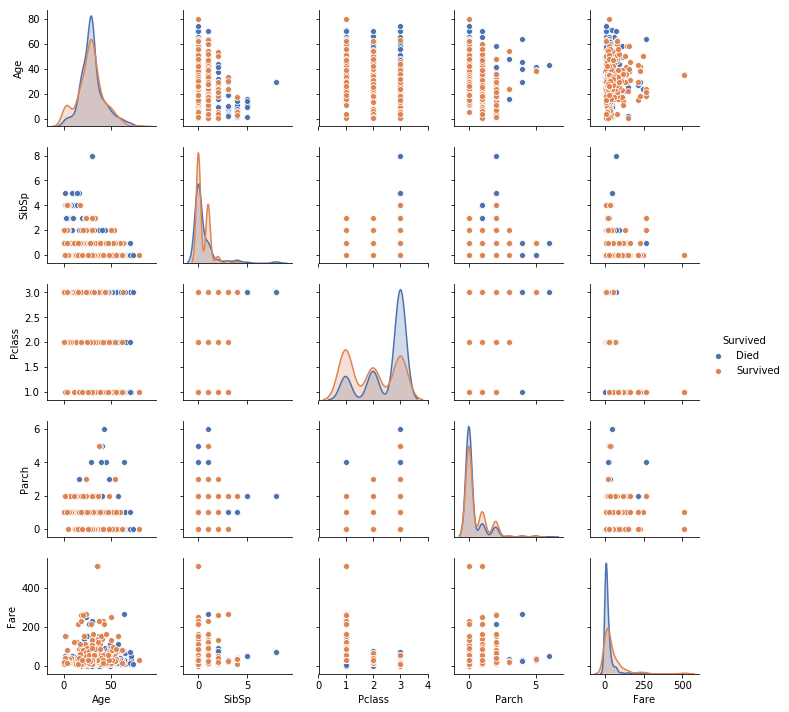

In [121]:
## 3 - Data pair relationship

col_names = ['Age','SibSp','Pclass','Parch','Fare']

def plot_pairplot(df, features):
    df_train2 = df.copy()
    df_train2.loc[df_train['Survived']==1,'Survived'] = 'Survived'
    df_train2.loc[df_train['Survived']==0,'Survived'] = 'Died'
    sns.pairplot(df_train2
                 ,hue='Survived'
                 ,vars=col_names
                 ,palette=sns.color_palette("deep", 10)
                 ,height=2)
    plt.savefig("../fig/1_seaborn_pair_plot.png")
    
plot_pairplot(df_train,col_names)

### How Sex and Embarked features affect to detect surviving cases

Each feauture where contrasted by Age

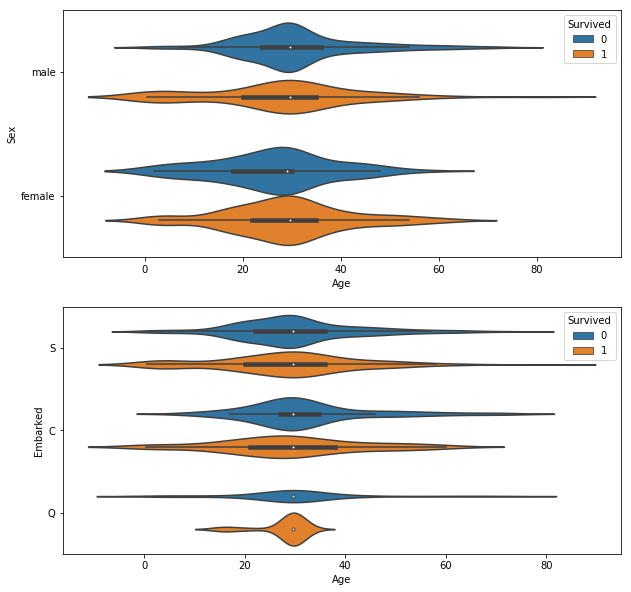

In [123]:

def plot_sex_embarked_agre_relation_titanic(df):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    g = sns.catplot(x='Age'
                ,y='Sex'
                ,hue='Survived'
                ,data=df
                ,kind='violin'
                ,ax=ax1)
    h = sns.catplot(x='Age'
                ,y='Embarked'
                ,hue='Survived'
                ,data=df
                ,kind='violin'
                ,ax=ax2)
    plt.close(g.fig)
    plt.close(h.fig)

plot_sex_embarked_agre_relation_titanic(df_train)